**Lab Performance 2**

Sohan Ahemmed

ID: 0242310005341266

Section: 40-F

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

df = pd.read_csv('/content/Titanic - Machine Learning from Disaster - Titanic - Machine Learning from Disaster.csv')

df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Preprocessing

a) Data Cleaning

In [7]:
# Check missing values
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [8]:

for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2158982398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2158982398.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [10]:
# Check data types
df.dtypes


,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


b) Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [12]:

df = pd.get_dummies(df, columns=[col for col in df.select_dtypes(include='object').columns if col != 'Embarked'])


In [13]:
# Encode target column
df['Embarked'] = le.fit_transform(df['Embarked'])


c) Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Embarked', axis=1)
y = df['Embarked']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


d) Train–Test Split (80%–20%)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Visualization
Histogram

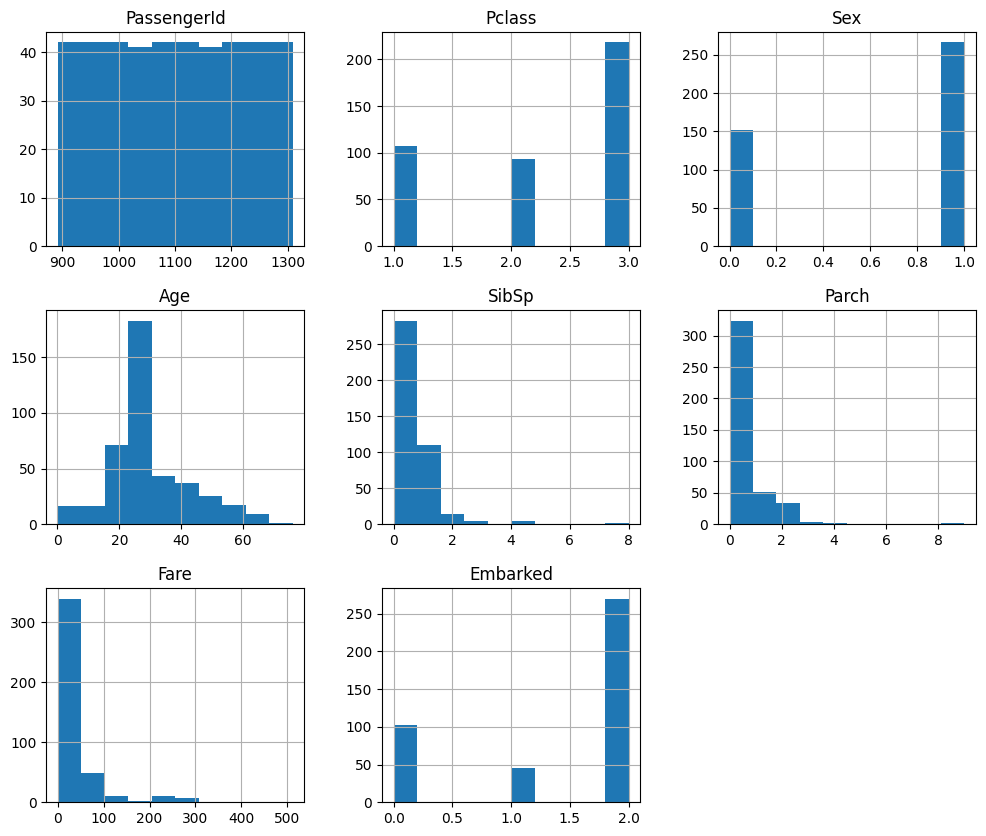

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,10))
plt.show()


Correlation Heatmap

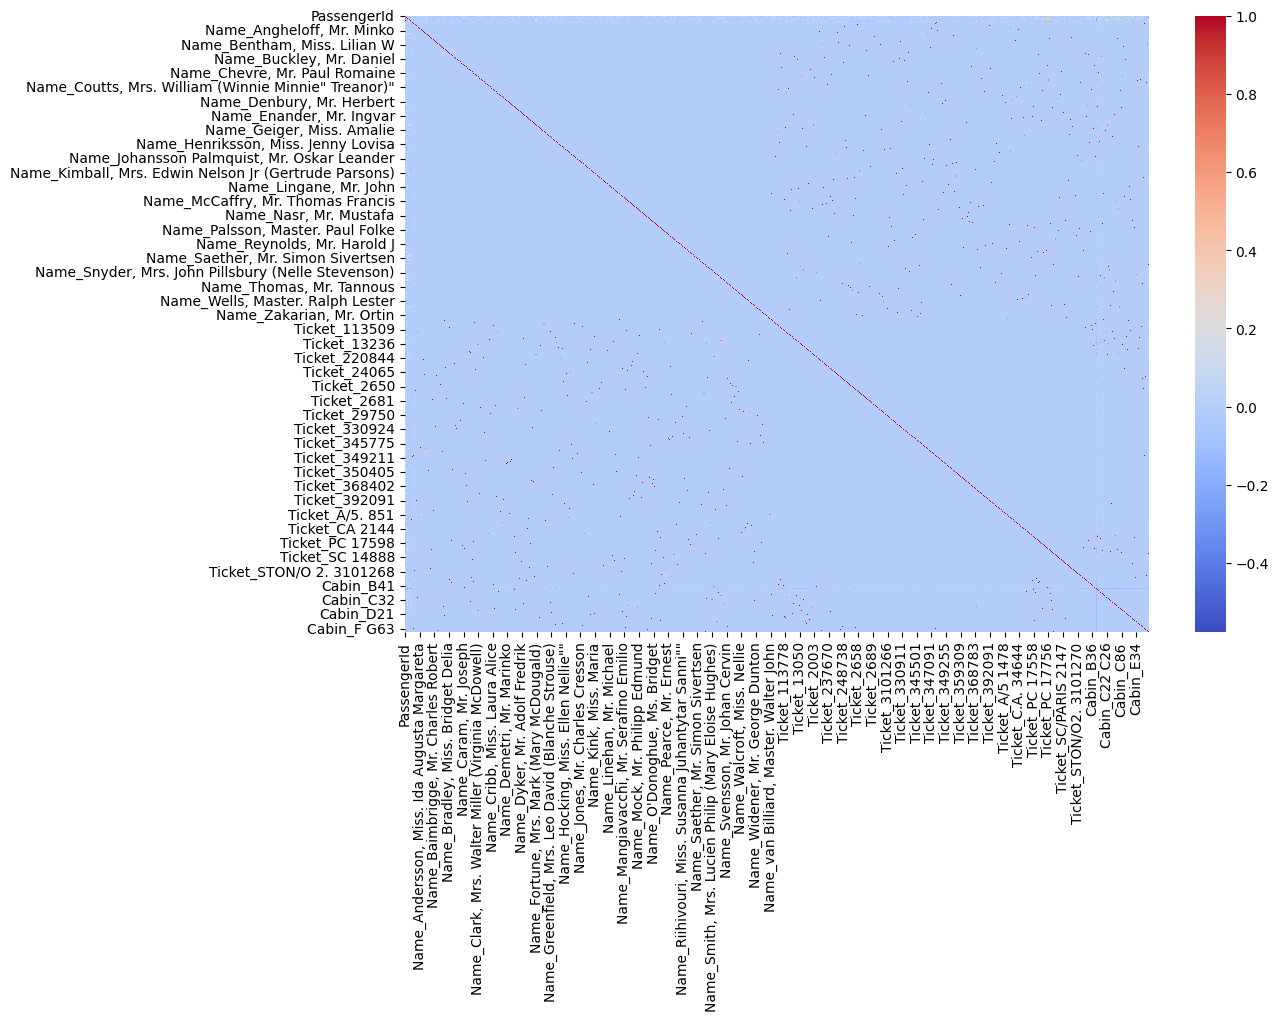

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


Scatter Plot

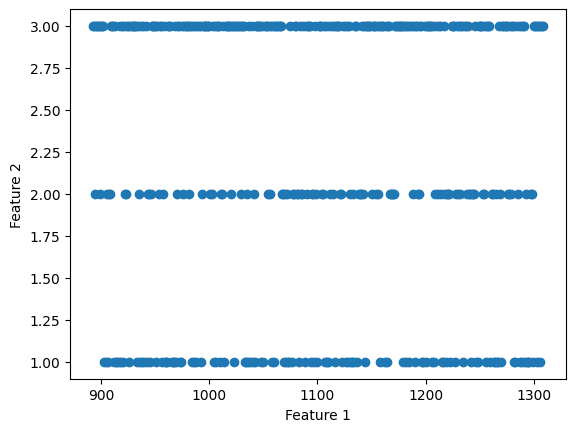

In [18]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Apply Five ML Algorithms



In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
[[ 2  0 18]
 [ 0  0  8]
 [ 0  0 56]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.00      0.00      0.00         8
           2       0.68      1.00      0.81        56

    accuracy                           0.69        84
   macro avg       0.56      0.37      0.33        84
weighted avg       0.69      0.69      0.58        84



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN
[[20  0  0]
 [ 7  0  1]
 [55  0  1]]
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        20
           1       0.00      0.00      0.00         8
           2       0.50      0.02      0.03        56

    accuracy                           0.25        84
   macro avg       0.25      0.34      0.14        84
weighted avg       0.39      0.25      0.12        84



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[ 5  0 15]
 [ 0  3  5]
 [ 9  1 46]]
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.75      0.38      0.50         8
           2       0.70      0.82      0.75        56

    accuracy                           0.64        84
   macro avg       0.60      0.48      0.52        84
weighted avg       0.62      0.64      0.62        84



Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
[[ 5  0 15]
 [ 0  0  8]
 [ 4  0 52]]
              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.00      0.00      0.00         8
           2       0.69      0.93      0.79        56

    accuracy                           0.68        84
   macro avg       0.42      0.39      0.38        84
weighted avg       0.59      0.68      0.61        84



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine

In [24]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM
[[ 0  0 20]
 [ 0  0  8]
 [ 0  0 56]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         8
           2       0.67      1.00      0.80        56

    accuracy                           0.67        84
   macro avg       0.22      0.33      0.27        84
weighted avg       0.44      0.67      0.53        84



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve (Logistic Regression)

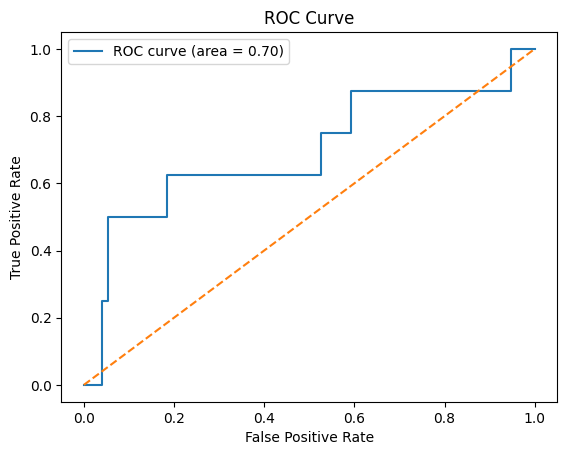

In [25]:
y_prob = lr.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Learning Curve

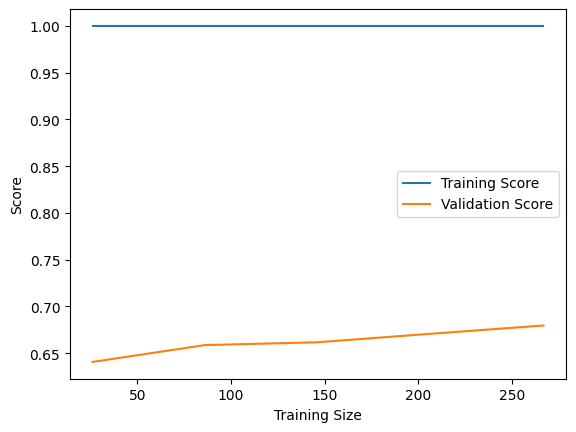

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train, y_train, cv=5
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()
